In [44]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir("..")

from quantum.trainer import MNIST01QAETrainer

In [45]:
trainer = MNIST01QAETrainer(num_trash_qubits=1)
trainer.train(num_train=100, max_iterations=300, random_seed=42)

# load a previously trained model
# trainer.qae_model.load_model("saved_models/mnist_qae_5000_300")

print(f"Training completed in {trainer.qae_model.training_time:.2f} seconds.")

INFO:root:No sampler provided, using StatevectorSampler by default.
INFO:absl:Load dataset info from /home/pi/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /home/pi/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /home/pi/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split ['train', 'test'], from /home/pi/tensorflow_datasets/mnist/3.0.1
12665it [00:03, 3263.22it/s]
/home/pi/uw/QuantumAutoencode/classical/utils/data_loader.py:92: RuntimeWarning: invalid value encountered in divide
  patched_dataset = patched_dataset / norms
INFO:root:Keeping only unique patches in the dataset.
INFO:root:Training data shape: (100, 64)


Training completed in 96.55 seconds.


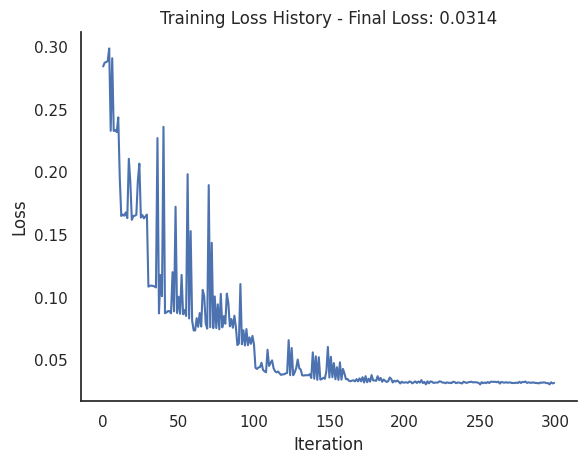

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=trainer.qae_model.training_history)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title(f"Training Loss History - Final Loss: {trainer.qae_model.training_history[-1]:.4f}")
plt.show()

In [47]:
# predict
import logging
logging.getLogger().setLevel(logging.INFO)
originals, predictions, mse_errors, fidelities = trainer.evaluate(num_test=5000)

2115it [00:00, 3142.78it/s]
/home/pi/uw/QuantumAutoencode/classical/utils/data_loader.py:92: RuntimeWarning: invalid value encountered in divide
  patched_dataset = patched_dataset / norms
INFO:root:Keeping only unique patches in the dataset.
INFO:root:Test data shape: (5000, 64)
100%|██████████| 5000/5000 [00:18<00:00, 264.96it/s]
INFO:root:Prediction completed in 18.89 seconds.


In [48]:
import numpy as np

metadata = {
    "description": "",
    "num_sampled_trained_on": trainer.qae_model.num_sampled_trained_on
    if hasattr(trainer.qae_model, "num_sampled_trained_on")
    else "Unknown",
    "test_samples": "Not evaluated",
    "final_loss": trainer.qae_model.training_history[-1]
    if trainer.qae_model.training_history
    else None,
    "training_iterations": len(trainer.qae_model.training_history),
    "average_mse": float(np.mean(mse_errors)) if mse_errors is not None else None,
    "average_fidelity": float(np.mean(fidelities)) if fidelities is not None else None,
}

trainer.qae_model.save_model("saved_models/mnist_qae_100_1_trash", metadata=metadata)

INFO:root:Model saved to saved_models/mnist_qae_100_1_trash.json and saved_models/mnist_qae_100_1_trash.pkl


('saved_models/mnist_qae_100_1_trash.json',
 'saved_models/mnist_qae_100_1_trash.pkl')

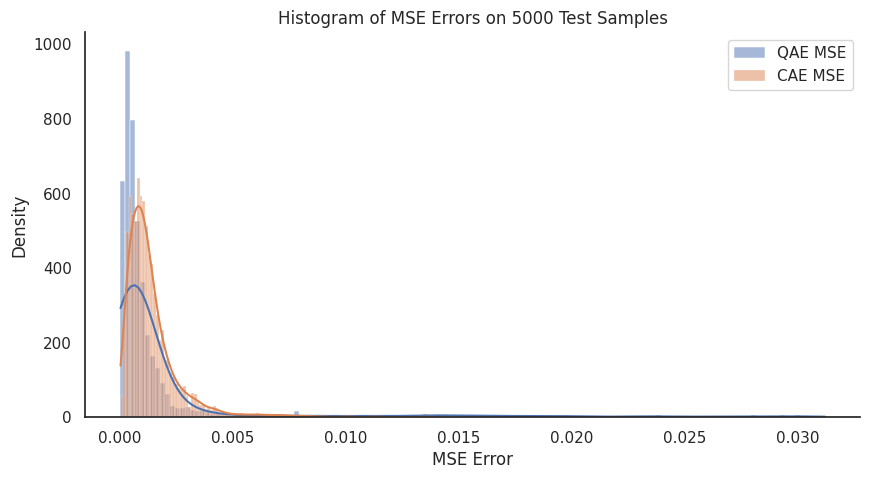

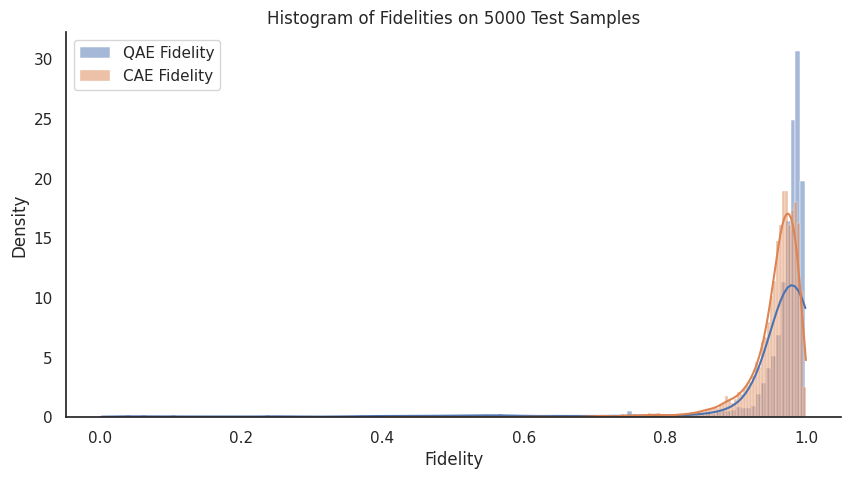

In [49]:
# plot histograms of fidelity
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(rc=custom_params, style="white")

cae_mse_errors = np.load("mnist_cae_mse_errors.npy")
cae_fidelities = np.load("mnist_cae_fidelities.npy")

# MSE (overlapped histograms)
plt.figure(figsize=(10, 5))
sns.histplot(mse_errors, label='QAE MSE', kde=True, stat="density", alpha=0.5)
sns.histplot(cae_mse_errors, label='CAE MSE', kde=True, stat="density", alpha=0.5)
plt.title("Histogram of MSE Errors on 5000 Test Samples")
plt.xlabel("MSE Error")
plt.ylabel("Density")
plt.legend()
plt.show()

# Fidelity (overlapped histograms)
plt.figure(figsize=(10, 5))
sns.histplot(fidelities, label='QAE Fidelity', kde=True, stat="density", alpha=0.5)
sns.histplot(cae_fidelities, label='CAE Fidelity', kde=True, stat="density", alpha=0.5)
plt.title("Histogram of Fidelities on 5000 Test Samples")
plt.xlabel("Fidelity")
plt.ylabel("Density")
plt.legend()
plt.show()

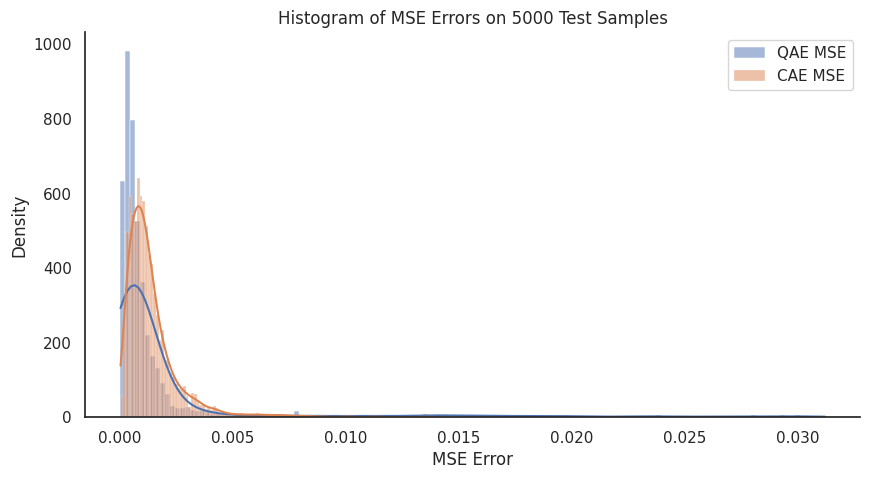

In [50]:
# plot histograms of fidelity
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(rc=custom_params, style="white")

cae_mse_errors = np.load("mnist_cae_mse_errors.npy")

# MSE (overlapped histograms)
plt.figure(figsize=(10, 5))
sns.histplot(mse_errors, label='QAE MSE', kde=True, stat="density", alpha=0.5)
sns.histplot(cae_mse_errors, label='CAE MSE', kde=True, stat="density", alpha=0.5)
plt.title("Histogram of MSE Errors on 5000 Test Samples")
plt.xlabel("MSE Error")
plt.ylabel("Density")
plt.legend()
plt.show()

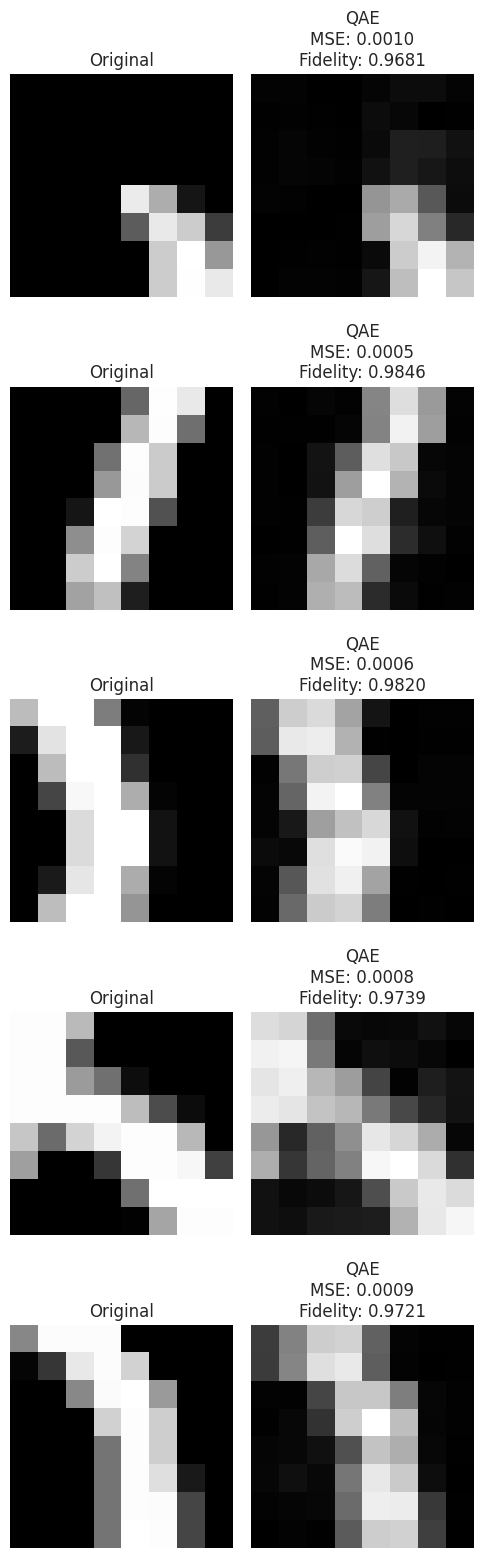

In [51]:
# plot results
fig, axes = plt.subplots(5, 2, figsize=(5, 5 * 3.2))
for i in range(5):
    axes[i, 0].imshow(originals[i].reshape(8, 8), cmap='gray')
    axes[i, 0].set_title("Original")
    axes[i, 0].axis('off')
    axes[i, 1].imshow(predictions[i].reshape(8, 8), cmap='gray')
    axes[i, 1].set_title(f"QAE\nMSE: {mse_errors[i]:.4f}\nFidelity: {fidelities[i]:.4f}")
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()